# Capstone in Mathematics (MTH 496) Final Project
## Data Exploration -- Patrick Thornton


#### This document is inspired and largly credited to the article 
#### "Predicting bike sharing trends with Python" by Wilame Lima Vallantin
#### URL: https://medium.com/@wilamelima/analysing-bike-sharing-trends-with-python-a9f574c596b9
#### Full Credit at top of relevant cells

### Package Imports

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math
from statsmodels.graphics.gofplots import qqplot
from sklearn import model_selection

### Open and read from data file

In [66]:
def read_data(feature):
    x_data = pd.read_csv(feature)
    x = x_data.values
    return x

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

### Data Manipulation

In [50]:
# Rename catagory "weathersit" to be more intuitive
train.rename(columns={'weathersit':'weather'},inplace=True)
test.rename(columns={'weathersit':'weather'},inplace=True)

# Drop date column given its integer representation is noise for this model
train = train.drop(['dteday'], axis=1)
test = test.drop(['dteday'], axis=1)

# Change string type columns to catagory typed columns
train['season'] = train.season.astype('category')
train['holiday'] = train.holiday.astype('category')
train['weather'] = train.weather.astype('category')
test['season'] = test.season.astype('category')
test['holiday'] = test.holiday.astype('category')
test['weather'] = test.weather.astype('category')


# Change catagorical data to int for graphs/correlation
train.holiday = train.holiday.eq('Yes').mul(1)
test.holiday = test.holiday.eq('Yes').mul(1)

seasons = {'spring': 0, 'summer': 1, 'fall': 2, 'winter': 3}
train.season = [seasons[item] for item in train.season]
test.season = [seasons[item] for item in test.season]

weathers = {'Clear': 0, 'Light Snow': 1, 'Mist+Cloudy': 2}
train.weather = [weathers[item] for item in train.weather]
test.weather = [weathers[item] for item in test.weather]

#### Valid data check

In [52]:
print(train.dtypes)
print(train.isnull().any())
test.isnull().any()

season       False
hr           False
holiday      False
weekday      False
weather      False
temp         False
atemp        False
hum          False
windspeed    False
cnt          False
dtype: bool


season       False
hr           False
holiday      False
weekday      False
weather      False
temp         False
atemp        False
hum          False
windspeed    False
cnt          False
dtype: bool

### Correlation heat map

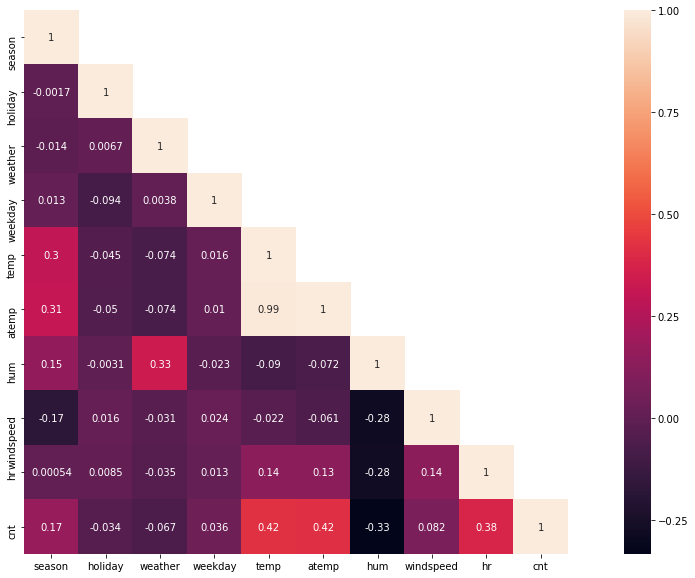

In [53]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Source: Predicting bike sharing trends with Python. 
# (2018). Medium. Retrieved 29 April 2019, from 
# https://medium.com/@wilamelima/analysing-bike-sharing-trends-with-python-a9f574c596b9
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
data_correlation = train[['season','holiday','weather','weekday','temp', 'atemp', 'hum', 'windspeed','hr', 'cnt']].corr()
mask = np.array(data_correlation)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(20,10))
sn.heatmap(data_correlation, mask=mask, vmax=1, square=True, annot=True)

### Determing trends between temp/hum/atemp/windspeed and total users

[Text(0.5, 1.0, 'Relation between windspeed and total users')]

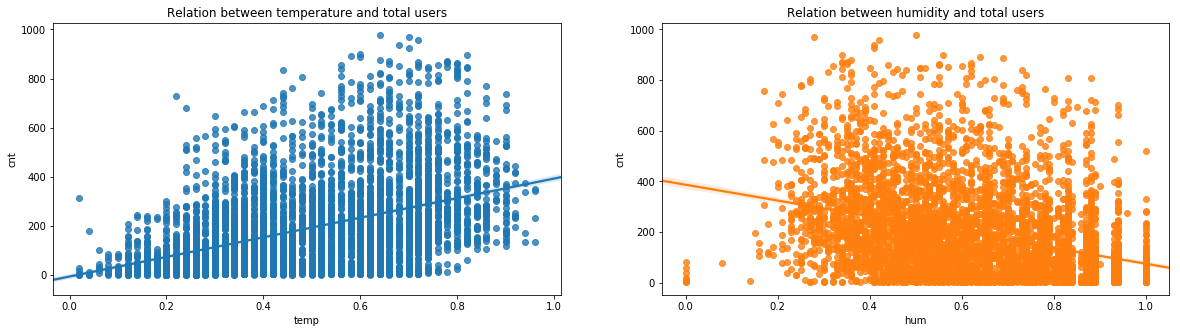

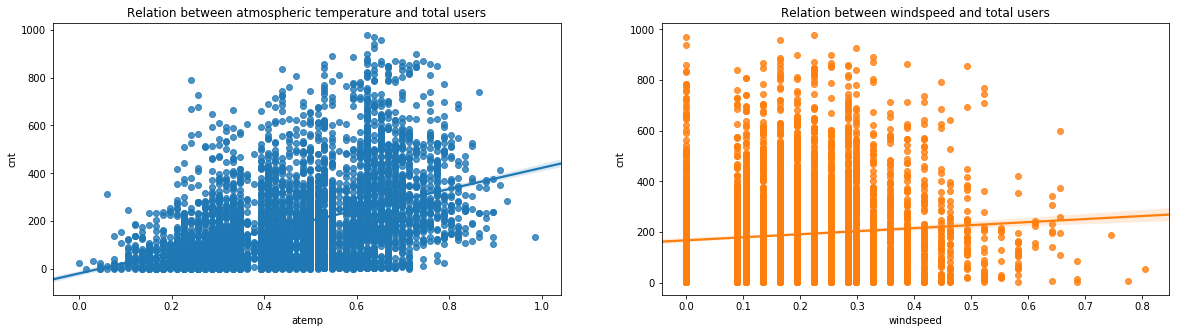

In [54]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Source: Predicting bike sharing trends with Python. 
# (2018). Medium. Retrieved 29 April 2019, from 
# https://medium.com/@wilamelima/analysing-bike-sharing-trends-with-python-a9f574c596b9
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sn.regplot(x=train['temp'], y=train['cnt'], ax=ax1)
ax1.set(title="Relation between temperature and total users")
sn.regplot(x=train['hum'], y=train['cnt'], ax=ax2)
ax2.set(title="Relation between humidity and total users")

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sn.regplot(x=train['atemp'], y=train['cnt'], ax=ax1)
ax1.set(title="Relation between atmospheric temperature and total users")
sn.regplot(x=train['windspeed'], y=train['cnt'], ax=ax2)
ax2.set(title="Relation between windspeed and total users")

### Relationship between hours of use and number of users for each day of week

[Text(0.5, 1.0, 'Use of the system during weekdays and weekends')]

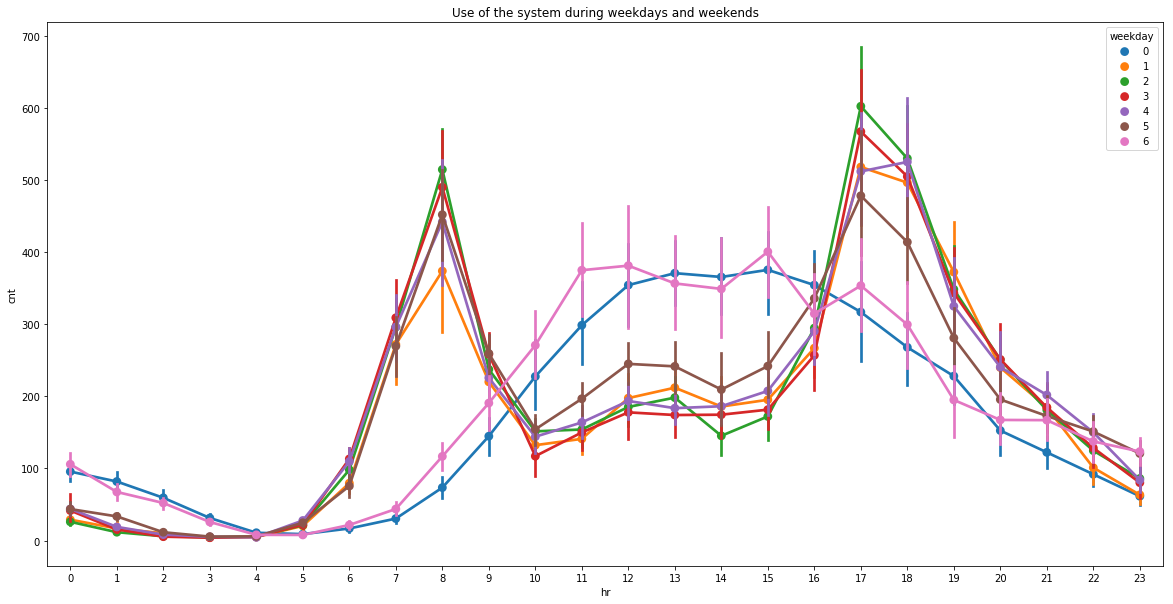

In [55]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Source: Predicting bike sharing trends with Python. 
# (2018). Medium. Retrieved 29 April 2019, from 
# https://medium.com/@wilamelima/analysing-bike-sharing-trends-with-python-a9f574c596b9
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=train[['hr',
                       'cnt',
                       'weekday']],
            x='hr', y='cnt',
            hue='weekday', ax=ax)
ax.set(title="Use of the system during weekdays and weekends")

### Relationship between hours of use and number of users for each weather condition

[Text(0.5, 1.0, 'Use of the system: weather condition')]

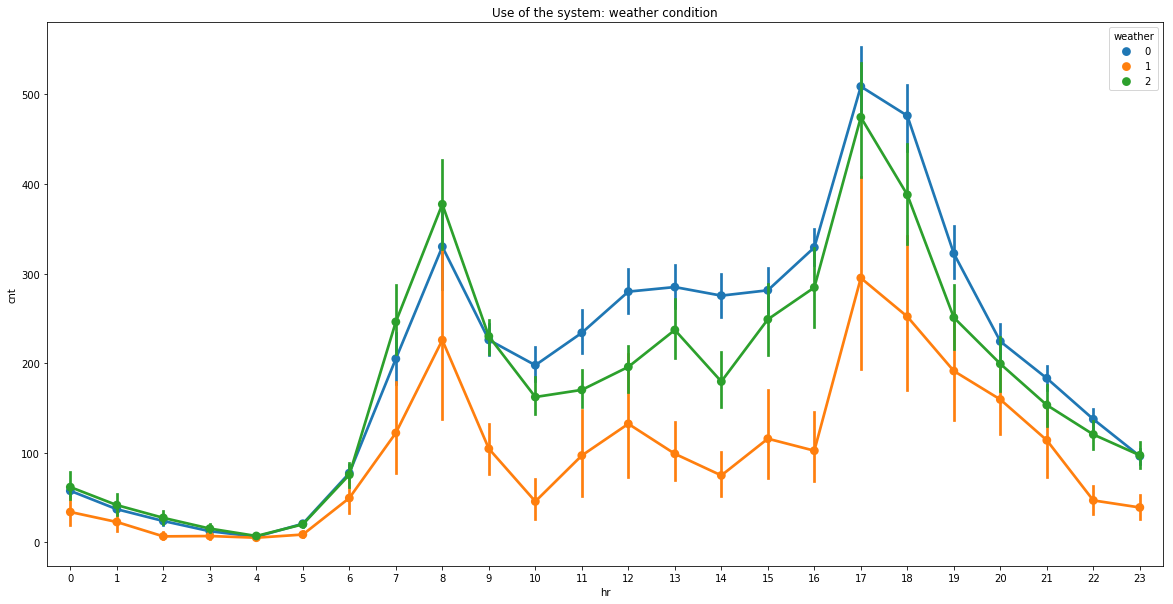

In [56]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Source: Predicting bike sharing trends with Python. 
# (2018). Medium. Retrieved 29 April 2019, from 
# https://medium.com/@wilamelima/analysing-bike-sharing-trends-with-python-a9f574c596b9
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=train[['hr',
                       'cnt',
                       'weather']],
            x='hr', y='cnt',
            hue='weather', ax=ax)
ax.set(title="Use of the system: weather condition")

### Distribution and outlier check for cnt, seasons, hour, day of week

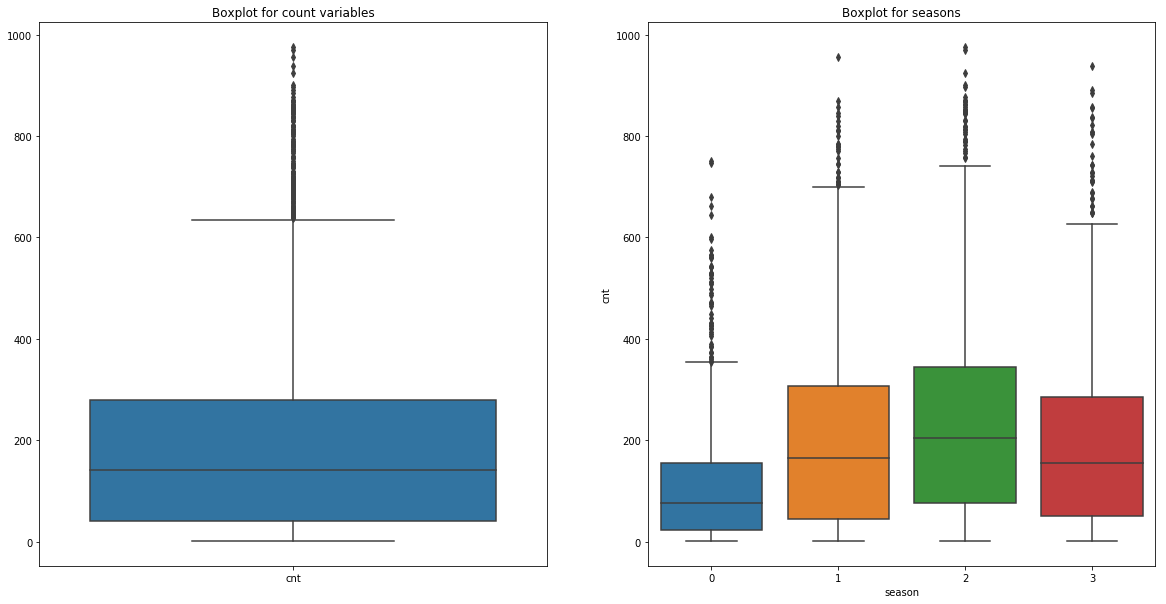

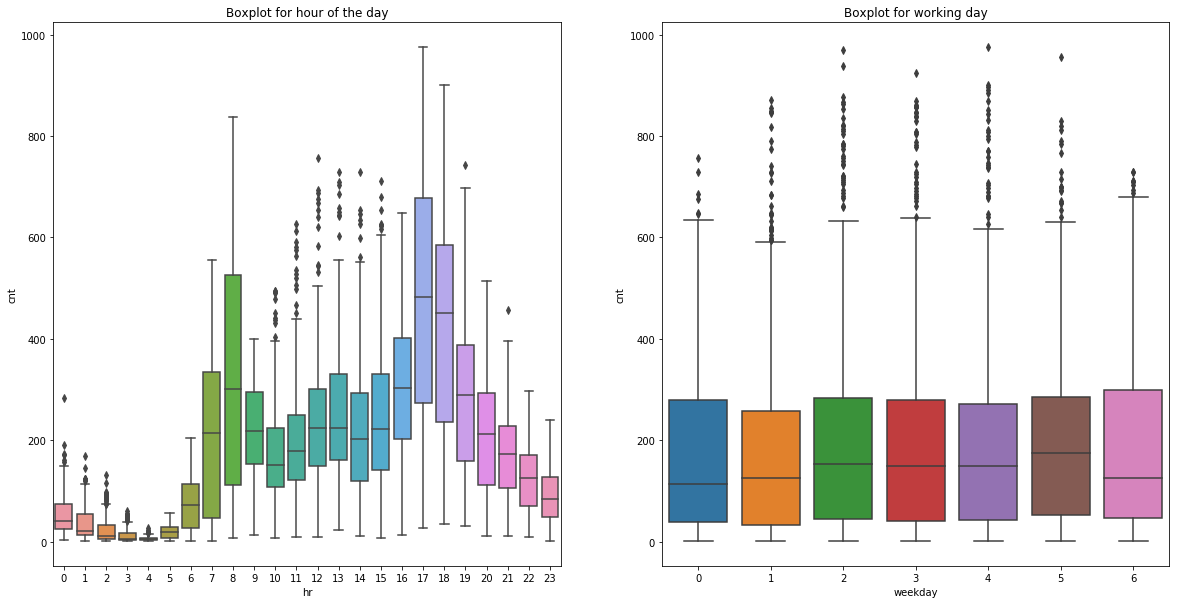

In [57]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Source: Predicting bike sharing trends with Python. 
# (2018). Medium. Retrieved 29 April 2019, from 
# https://medium.com/@wilamelima/analysing-bike-sharing-trends-with-python-a9f574c596b9
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
sn.boxplot(data=train[['cnt']], ax=ax1)
ax1.set(title="Boxplot for count variables")
sn.boxplot(x=train['season'],y=train['cnt'], ax=ax2)
ax2.set(title="Boxplot for seasons")

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
ax1.set(title="Boxplot for hour of the day")
sn.boxplot(x=train['hr'],y=train['cnt'], ax=ax1)
ax2.set(title="Boxplot for working day")
sn.boxplot(x=train['weekday'],y=train['cnt'], ax=ax2)

## Log-normalized count visualization

[Text(0.5, 1.0, 'Theoretical quantiles')]

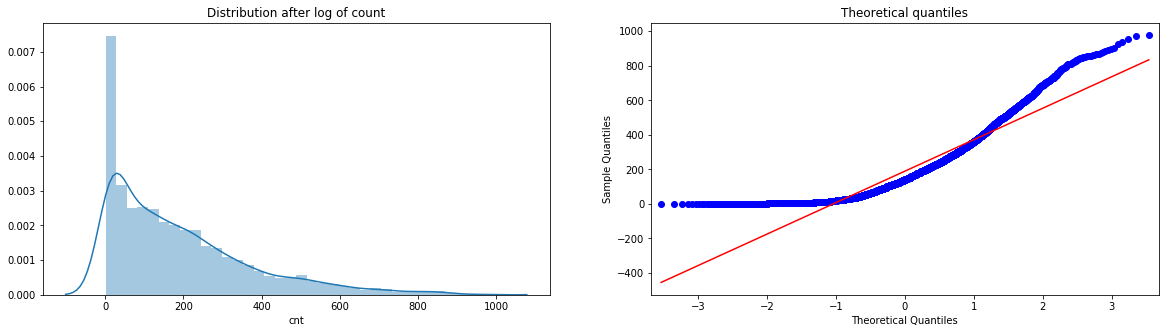

In [58]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Source: Predicting bike sharing trends with Python. 
# (2018). Medium. Retrieved 29 April 2019, from 
# https://medium.com/@wilamelima/analysing-bike-sharing-trends-with-python-a9f574c596b9
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sn.distplot(train['cnt'], ax=ax1)
ax1.set(title="Distribution after log of count")
qqplot(train['cnt'], line='s', ax=ax2)
ax2.set(title="Theoretical quantiles")

In [59]:
train['cnt'] = train['cnt'].transform(lambda x: math.log(x))
test['cnt'] = test['cnt'].transform(lambda x: math.log(x))

[Text(0.5, 1.0, 'Theoretical quantiles')]

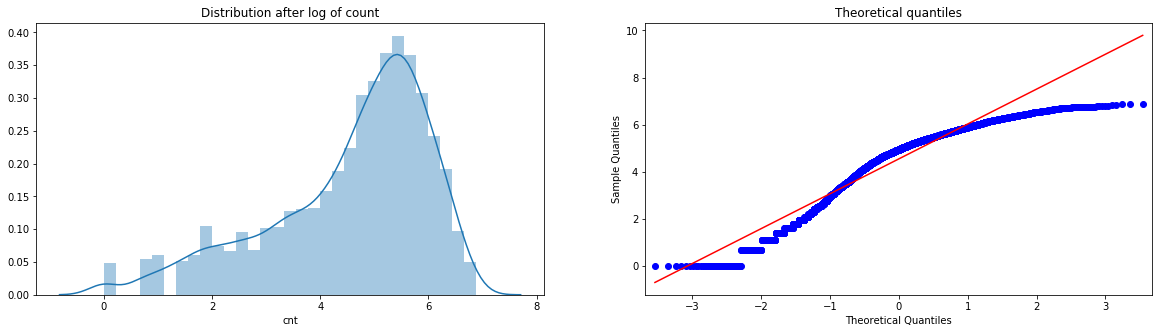

In [60]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Source: Predicting bike sharing trends with Python. 
# (2018). Medium. Retrieved 29 April 2019, from 
# https://medium.com/@wilamelima/analysing-bike-sharing-trends-with-python-a9f574c596b9
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sn.distplot(train['cnt'], ax=ax1)
ax1.set(title="Distribution after log of count")
qqplot(train['cnt'], line='s', ax=ax2)
ax2.set(title="Theoretical quantiles")

## Preprocessing for model comparison

In [61]:
def one_hot_encoder(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

train_ohe = train
test_ohe = test

cats = ['season','holiday','weather']
for cat in cats:
    train_ohe = one_hot_encoder(train_ohe, cat)
    test_ohe = one_hot_encoder(test_ohe, cat)

In [62]:
y_train =  train_ohe['cnt']
X_train = train_ohe.drop(['cnt'], axis=1)
y_test =  test_ohe['cnt']
X_test = test_ohe.drop(['cnt'], axis=1)

## Model Comparison

In [65]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Source: Predicting bike sharing trends with Python. 
# (2018). Medium. Retrieved 29 April 2019, from 
# https://medium.com/@wilamelima/analysing-bike-sharing-trends-with-python-a9f574c596b9
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

models = [Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(), 
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          BaggingRegressor()]

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    predicted = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(predicted.mean())
    
for model in models:
    test_algorithms(model)

-1.1333835916405819
-1.1471926261302505


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the defau

-1.1459197250834936
-0.4825830174096863


c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:2

-0.2678084153038838
-0.3012762098877061


c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:2

-0.25845157254728923
-0.2570462571370136
